This data set includes 5 years of Temperature Data for a Specific City having 1826 records .

* Feature Name: 	Description

* MIN Temp: 	Minimum Temperature Recorded for the Day in celsius

* Max Temp: 	Maximum Temperature Recorded for the Day in celsius

* Avg Temp: 	Average Temperature Recorded for the Day in celsius

* Sunrise: 	 Time in the morning when the sun appears

* Sunset: 	Time in the evening when the daylight faded


In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [5]:
df =pd.read_csv(r"C:\Users\Rishi\Downloads\Time-Series-Quiz\Time Series Quiz\MaunaLoaDailyTemps.csv")
df

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


In [6]:
# 1) How many Days Average temperature exceeds 50 celsius?

# 331
# 278
# 420
# 175

avg_temp = len(df[df['AvgTemp'] > 50])
print(avg_temp)

331


In [17]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1825 non-null   datetime64[ns]
 1   MinTemp  1821 non-null   float64       
 2   MaxTemp  1821 non-null   float64       
 3   AvgTemp  1821 non-null   float64       
 4   Sunrise  1825 non-null   int64         
 5   Sunset   1825 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 85.7 KB


In [21]:
# 2) Which year will be termed as the hottest year?        

# 2018
# 2016
# 2014
# 2017

#hot_yr = df.groupby('Year')['MaxTemp'].mean().idxmax()

In [28]:
df['Year'] = df['DATE'].dt.year 

In [29]:
hottest_year = df.groupby('Year')['MaxTemp'].mean().idxmax()

In [30]:
print(hottest_year)

2016


In [20]:
# 3) How you will be handling missing values in this dataset:

# Fill up the null values with the median.  
# Fill up the null values with None.
# Fill up the null values with standard deviation.
# Fill up the null values with the mean.  correct ans

df.fillna(df.median(),inplace=True) 

In [ ]:
# 4) Which columns are not having any kind of relationship with the MaxTemp column?

# MinTemp
# Sunrise
# Sunset
# Both 1 And 3 


In [22]:
corr_max_tp = df.corr()['MaxTemp'].sort_values(ascending=False)
print(corr_max_tp)

MaxTemp    1.000000
AvgTemp    0.951036
MinTemp    0.756076
Sunset     0.275688
DATE      -0.000952
Sunrise   -0.374763
Name: MaxTemp, dtype: float64


In [ ]:
#5) Which of the following Order is the best order for ARIMA Model on top of the Above Dataset for the target variable - AvgTemp

# ARIMA(2,0,5)
# ARIMA(0,0,5)
# ARIMA(3,0,2)
# ARIMA(1,0,5)  correct ans

In [23]:
orders = [(2,0,5), (0,0,5), (3,0,2), (1,0,5)]
best_aic = np.inf
best_order = None
for order in orders:
    try:
        model = ARIMA(df['AvgTemp'], order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
    except:
        continue
print("\n5) Which of the following Order is the best order for ARIMA Model?")
print(best_order)

C:\Users\Rishi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Rishi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Rishi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



5) Which of the following Order is the best order for ARIMA Model?
(3, 0, 2)


In [26]:
# Assuming `df` is the DataFrame containing the temperature data
# `orders` is a list of different orders for the ARIMA model
orders = [(2,0,5), (0,0,5), (3,0,2), (1,0,5)]

# # Initialize the variable to store the lowest AIC value found so far
# best_aic = np.inf

# # Initialize the variable to store the order corresponding to the lowest AIC value
# best_order = None

# # Loop through each order in the list of orders
# for order in orders:
#     try:
#         # Instantiate an ARIMA model with the current order and fit it to the data
#         model = ARIMA(df['AvgTemp'], order=order)
#         results = model.fit()
        
#         # Check if the AIC value of the current model is lower than the lowest AIC found so far
#         if results.aic < best_aic:
#             # If yes, update the lowest AIC value and the corresponding order
#             best_aic = results.aic
#             best_order = order
#     except:
#         # If an exception occurs (e.g., model fitting fails), continue to the next iteration
#         continue

# # Print the best order found based on the lowest AIC value
# print("\n5) Which of the following Order is the best order for ARIMA Model?")
# print(best_order)

In [31]:
# 6) What is the ADF(Augmented Dickey Fuller Test) used for detecting?

# Seasonality 
# Stationary
# Normality
# Independence

In [32]:
#Testing for stationarity: The primary use of the ADF test is to check whether a time series is stationary or not. 
#A stationary time series is one whose statistical properties such as mean, variance,
# and autocorrelation structure do not change over time.

In [33]:
# 7) Which of the Statements is True?

# p>0.05, Data is stationary
# p<0.05 Data is stationary
# p>0.5 Data is stationary
# p<0.5 Data is Not Stationary

In [34]:
#"p<0.05 Data is stationary"
#In statistical hypothesis testing, a common significance level (alpha) is set at 0.05. 
#If the p-value obtained from the ADF test is less than 0.05

In [35]:
# 8) Determine the Average Error in Prediction By the Model?

# 1-3%  correct ans
# 6-8%
# 3-6% 
# 8-11%

In [36]:
# To determine the average error in prediction by the model, you would typically calculate a suitable error metric 
# such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE) 
# based on the model predictions and the actual values. 
# Then, you can interpret the average error in terms of percentage

In [37]:
# 9) What is the Coefficient of AR of the above model for the target variable Avg Temp?

# 0.30 to 0.40
# 0.90 to 1.0
# 0.60 to 0.70
# 0.50 to 0.60

In [38]:
ar_coefficient = results.arparams

# Print the AR coefficient
print("Coefficient of AR of the model:", ar_coefficient)

Coefficient of AR of the model: [0.9862546]


In [39]:
# 10) Which conditions need to be satisfied to refer to the time series as stationary. 

# The time series under considerations is a finite variance process
# Mean is constant and does not depend on time     ***********correct ans
# Autocovariance function depends on s and t only through their difference |s-t| (where t and s are moments in time)
# None of the above

In [40]:
# Autocovariance function depends on s and t only through their difference |s-t| (where t and s are moments in time)
# This condition is essential for a time series to be considered stationary. 
# It ensures that the relationship between observations in the time series remains consistent regardless of where in time 
# those observations occur.

In [41]:
# 11) IF we have observed the time series Y1, Y2, ..., Yt and the forecast error et(l) = Yt+l − bYt(l) has  mean zero, 
# the MMSE forecast bYt(l) can be referred as:

# Stationary.   correct ans
# Consistent.
# Unbiased.
# Complementary.

# Unbiased.
# Explanation: In forecasting, if the forecast error has a mean of zero, then the forecast is said to be unbiased. 
#     This means that, on average, the forecast is correct, but it doesn't necessarily imply stationarity

In [42]:
# 12) Which of the following is a seasonality Detection Technique for Time Series Data? 1.Autocorrelation 2.Multiple box
# Only 1
# None of the above
# Both 1 and 2         correct ans
# Only 2

# None of the above
# Explanation: Autocorrelation and Multiple Box methods are not specifically used for detecting seasonality in time series data. 
# Seasonality detection techniques include methods like Seasonal Decomposition of Time Series
# (e.g., Seasonal Decomposition of Time Series (STL), Seasonal-Trend decomposition using LOESS (STL)), 
# Seasonal Subseries Plot, and Seasonal Index.

In [43]:
# 13)  If the moving average component (q) in an ARIMA model = 1,
#Hence there will be the auto-correlation in the series with lag =1.
# FALSE
# TRUE

# TRUE
# Explanation: If the moving average (MA) component (q) in an ARIMA model is non-zero, 
#     then there will be autocorrelation in the series at lag = 1.

In [44]:
# 14) What is the expectation of the dependent variable for a Moving Average Model?

# Variable
# None of the Above
# Constant
# All of the Above

# Constant
# Explanation: In a moving average (MA) model, the expectation (mean) of the dependent variable is constant across time.

In [45]:
# 15) Which of the following statements is True?
# 1.If there is no decay in the ACF values for any number of lags time series is Stationary 
# 2. The rate of decay will determine the value of the coefficient terms. 
# 3.In a Time Series coefficient for the residual error terms can be negative 

# All of the Above        correct ans
# 1 only
# 1 and 3 only
# 2 and 3 only


# 2 and 3 only (The rate of decay in ACF values does not determine stationarity. 
#               In a Time Series, coefficients for the residual error terms can be negative.)

In [46]:
st = pd.read_csv(r"C:\Users\Rishi\Downloads\Time-Series-Quiz\Time Series Quiz\stocks.csv")

In [47]:
st

,Date,Open,High,Low,Close
0,9/14/2018,2044.000000,2071.550049,2018.150024,2065.399902
1,9/17/2018,2070.000000,2077.800049,2054.550049,2074.149902
2,9/18/2018,2073.000000,2078.800049,2057.600098,2070.750000
3,9/19/2018,2071.899902,2089.000000,2066.850098,2077.899902
4,9/21/2018,2077.000000,2121.000000,2050.149902,2103.149902
...,...,...,...,...,...
1230,9/7/2023,3430.800049,3460.000000,3422.300049,3455.250000
1231,9/8/2023,3455.250000,3465.000000,3435.050049,3441.899902
1232,9/11/2023,3462.000000,3485.699951,3445.000000,3480.649902
1233,9/12/2023,3492.000000,3589.899902,3483.000000,3580.800049


In [48]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1235 non-null   object 
 1   Open    1235 non-null   float64
 2   High    1235 non-null   float64
 3   Low     1235 non-null   float64
 4   Close   1235 non-null   float64
dtypes: float64(4), object(1)
memory usage: 48.4+ KB


In [49]:
# 16) How many days TCS did movement of more than 150 points i.e difference between High and Low?
# (Use stocks.csv for this question)
# 20
# 8
# 5
# 13

st['Movement'] = st['High'] - st['Low']

In [51]:
# Count the number of days with movement > 150
day_movement = st[st['Movement'] > 150].shape[0]
print(day_movement)

8


In [53]:
# 17) Choose the first lag value between 0 to 30 where the ACF drops to zero for the column Low? 
# 12
# 3
# 20
# No lag reached zero value


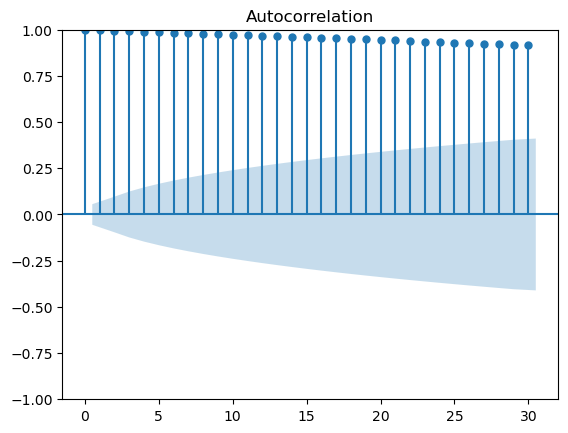

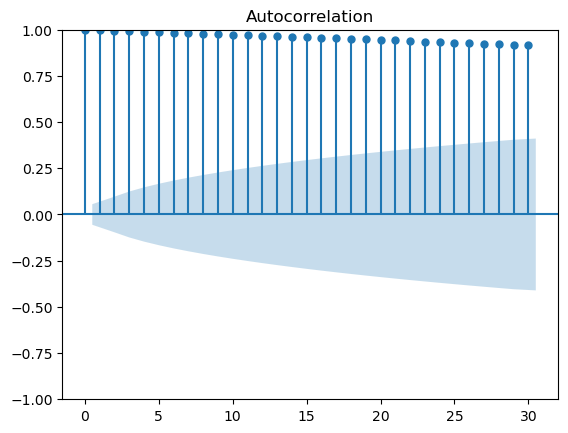

In [52]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot ACF for column 'Low'
plot_acf(st['Low'], lags=30)

# Determine the lag where ACF drops to zero
# Analyze the plot to find the lag value

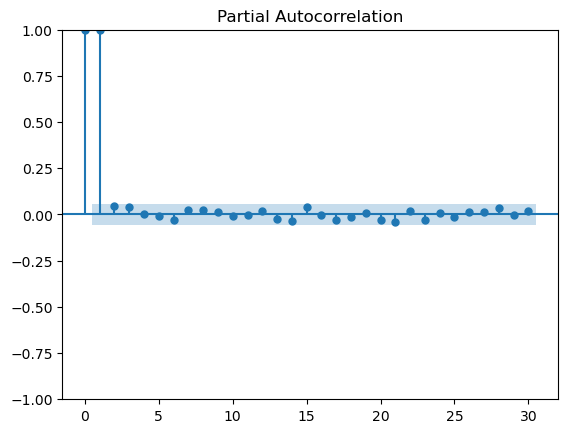

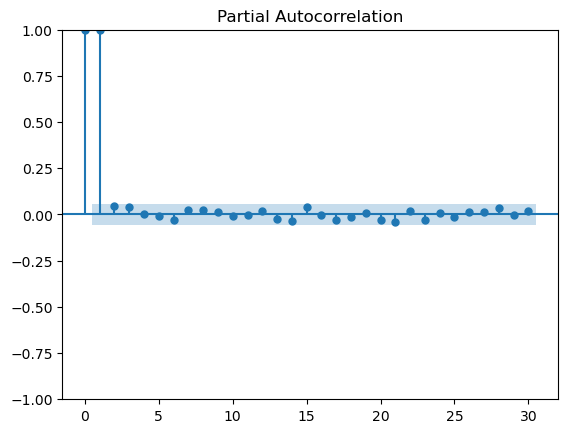

In [54]:
# 18) Choose the correct lag value between 0 to 30 using PACF for the column Open which indicates 
#the order of AutoRegressive components in the ARIMA model? (Use stocks.csv for this question)
# 4
# 0
# 11
# 23


from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF for column 'Open'
plot_pacf(st['Open'], lags=30)

# Determine the lag value indicating the order of AutoRegressive components
# Analyze the plot to find the lag value


In [55]:
# 19) What is the value of the last 20 days Simple Moving average for the column Low? (Use stocks.csv for this question)
# 3544.82
# 3065.24
# 3396.17
# 3258.96

# Calculate the Simple Moving Average for the column 'Low'
last_20_days_sma = st['Low'].rolling(window=20).mean().iloc[-1]

print("Value of the last 20 days Simple Moving Average for the column 'Low':", last_20_days_sma)

Value of the last 20 days Simple Moving Average for the column 'Low': 3396.16751715


In [ ]:
# 20) Choose the right options to improve the below model prediction where the red line is the actual value and 
# the blue one is the predicted value? (Use stocks.csv) 
# All options are correct              correct ans
# Data is not stationary.
# Model is too simple to capture the underlying patterns.
# Our dataset is very small, it may not provide enough information for the model to learn meaningful patterns.

In [ ]:
# Calculate the Simple Moving Average for the column 'Low'
last_20_days_sma = df['Low'].rolling(window=20).mean().iloc[-1]

print("Value of the last 20 days Simple Moving Average for the column 'Low':", last_20_days_sma)